In [1]:
import presubmit_tests

In [3]:
presubmit_tests.test_python3()

In [4]:
presubmit_tests.test_QuadraticOracle()

In [1]:
import numpy as np

In [5]:
A = np.arange(0, 12).reshape(4,3)
A

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [6]:
A.T @ A

array([[126, 144, 162],
       [144, 166, 188],
       [162, 188, 214]])

In [7]:
s = np.array([1,2,3,4])
s

array([1, 2, 3, 4])

In [10]:
(A.T * s) @ A

array([[450, 510, 570],
       [510, 580, 650],
       [570, 650, 730]])

In [12]:
A.T*s

array([[ 0,  6, 18, 36],
       [ 1,  8, 21, 40],
       [ 2, 10, 24, 44]])

In [13]:
A.T

array([[ 0,  3,  6,  9],
       [ 1,  4,  7, 10],
       [ 2,  5,  8, 11]])

In [14]:
from scipy import sparse

In [16]:
A_s = sparse.csr_array(A)

In [21]:
(A_s.T * s).toarray()

array([[ 0,  6, 18, 36],
       [ 1,  8, 21, 40],
       [ 2, 10, 24, 44]])

# 3.1 Эксперимент: Траектория градиентного спуска на квадратичной функции


In [3]:
from optimization import gradient_descent
from oracles import QuadraticOracle
import numpy as np

oracle = QuadraticOracle(np.eye(5), np.arange(5))
x_opt, message, history = gradient_descent(oracle, np.zeros(5), line_search_options={'method': 'Wolfe'}, trace=True)
print('Found optimal point: {}'.format(x_opt))

Found optimal point: [0. 1. 2. 3. 4.]


In [4]:
history

defaultdict(list,
            {'x': [array([0., 0., 0., 0., 0.]),
              array([0., 1., 2., 3., 4.]),
              array([0., 1., 2., 3., 4.])],
             'func': [np.float64(0.0), np.float64(-15.0), np.float64(-15.0)],
             'grad_norm': [np.float64(30.0),
              np.float64(30.0),
              np.float64(0.0)]})

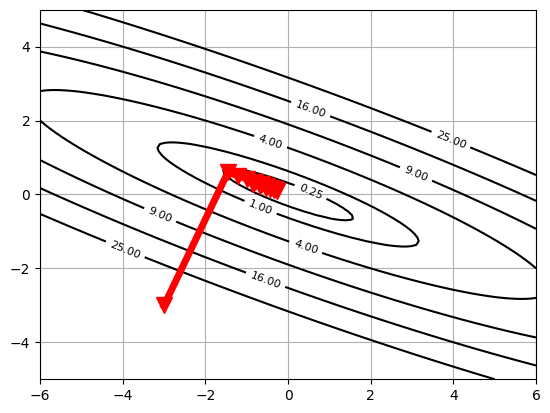

In [12]:
import oracles
from plot_trajectory_2d import plot_levels, plot_trajectory


oracle = oracles.QuadraticOracle(np.array([[1.0, 2.0], [2.0, 5.0]]), np.zeros(2))
plot_levels(oracle.func)
x_opt, message, history = gradient_descent(oracle, -np.ones(2) * 3, line_search_options={'method': 'Wolfe'}, trace=True)
plot_trajectory(oracle.func, history['x'])#, fit_axis=False, label=None)